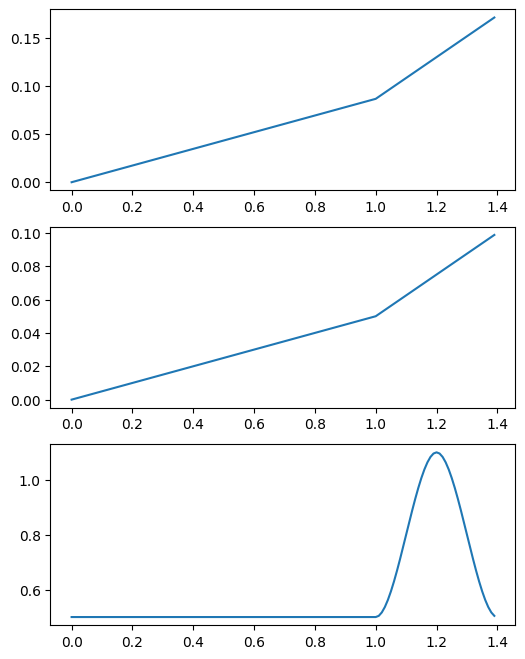

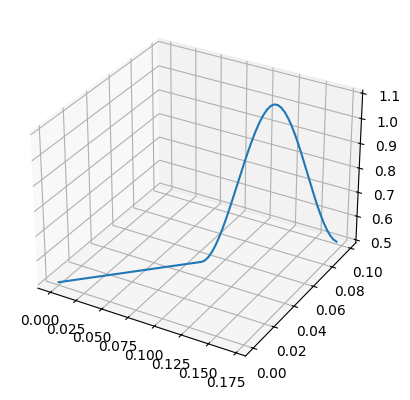

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline as spline
from scipy.interpolate import PPoly as ppoly
import matplotlib.pyplot as plt

class ParameterizedJump:

    XYZBASE = [0, 0, 0.5]

    def __init__(self, t, theta, DW, DJ, HJ):
        
        assert(len(t) == 4)
        
        # Trajectory representation
        p0 = [self.XYZBASE[0], self.XYZBASE[1], self.XYZBASE[2]]
        p1 = [self.XYZBASE[0] + DW*np.cos(theta*np.pi/180), self.XYZBASE[1] + DW*np.sin(theta*np.pi/180), self.XYZBASE[2]]
        p2 = [p1[0] + DJ*0.5*np.cos(theta*np.pi/180), p1[1] + DJ*0.5*np.sin(theta*np.pi/180), HJ]
        p3 = [p2[0] + DJ*0.5*np.cos(theta*np.pi/180), p2[1] + DJ*0.5*np.sin(theta*np.pi/180), self.XYZBASE[2]]

        p = np.array([p0, p1, p2, p3]).reshape((-1, 3))

        self.Xspline = self.makeLPPoly(t, p[:, 0])
        self.Yspline = self.makeLPPoly(t, p[:, 1])
        self.Zspline = self.makeHPPoly(t, p[:, 2])

    def setXYZBASE(self, xyzbase : list):
        
        self.XYZBASE = xyzbase

    def makeLPPoly(self, x, y):
        
        y = list(y)
        spline0 = spline(x=x[0:2], y=y[0:2], bc_type=((2, 0), (2, 0)))
        spline1 = spline(x=x[1:3], y=y[1:3], bc_type=((2, 0), (2, 0)))
        spline2 = spline(x=x[2:4], y=y[2:4], bc_type=((2, 0), (2, 0)))

        return ppoly(c = np.hstack((spline0.c, spline1.c, spline2.c)), x=x)
    
    def makeHPPoly(self, x, y):
        
        y = list(y)
        spline0 = spline(x=x[0:2], y=y[0:2], bc_type=((2, 0), (2, 0)))
        spline1 = spline(x=x[1:3], y=y[1:3], bc_type=((1, 0), (1, 0)))
        spline2 = spline(x=x[2:4], y=y[2:4], bc_type=((1, 0), (1, 0)))

        return ppoly(c = np.hstack((spline0.c, spline1.c, spline2.c)), x=x)
         
    def getPointAtTime(self, ts):
        points = [[self.Xspline(t), self.Yspline(t), self.Zspline(t)] for t in ts]
        return np.array(points).reshape((-1, 3))


# Trajectory representation
theta = 30 # direction of the trajectory
DW = 0.1   # distance of the walk
DJ = 0.1   # width of the jump
HJ = 1.1   # maxheight of the jump

# Control points
t = [0, 1, 1.2, 1.4]
jump = ParameterizedJump(t, theta, DW, DJ, HJ)

# Sampling time
ts = np.arange(t[0], t[-1], 0.01)
ps = jump.getPointAtTime(ts)

# Plot the x y z vs time
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
axes[0].plot(ts, ps[:, 0])
axes[1].plot(ts, ps[:, 1])
axes[2].plot(ts, ps[:, 2])

# Plot the x y z vs time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(ps[:, 0], ps[:, 1], ps[:, 2])


array(0.1425)

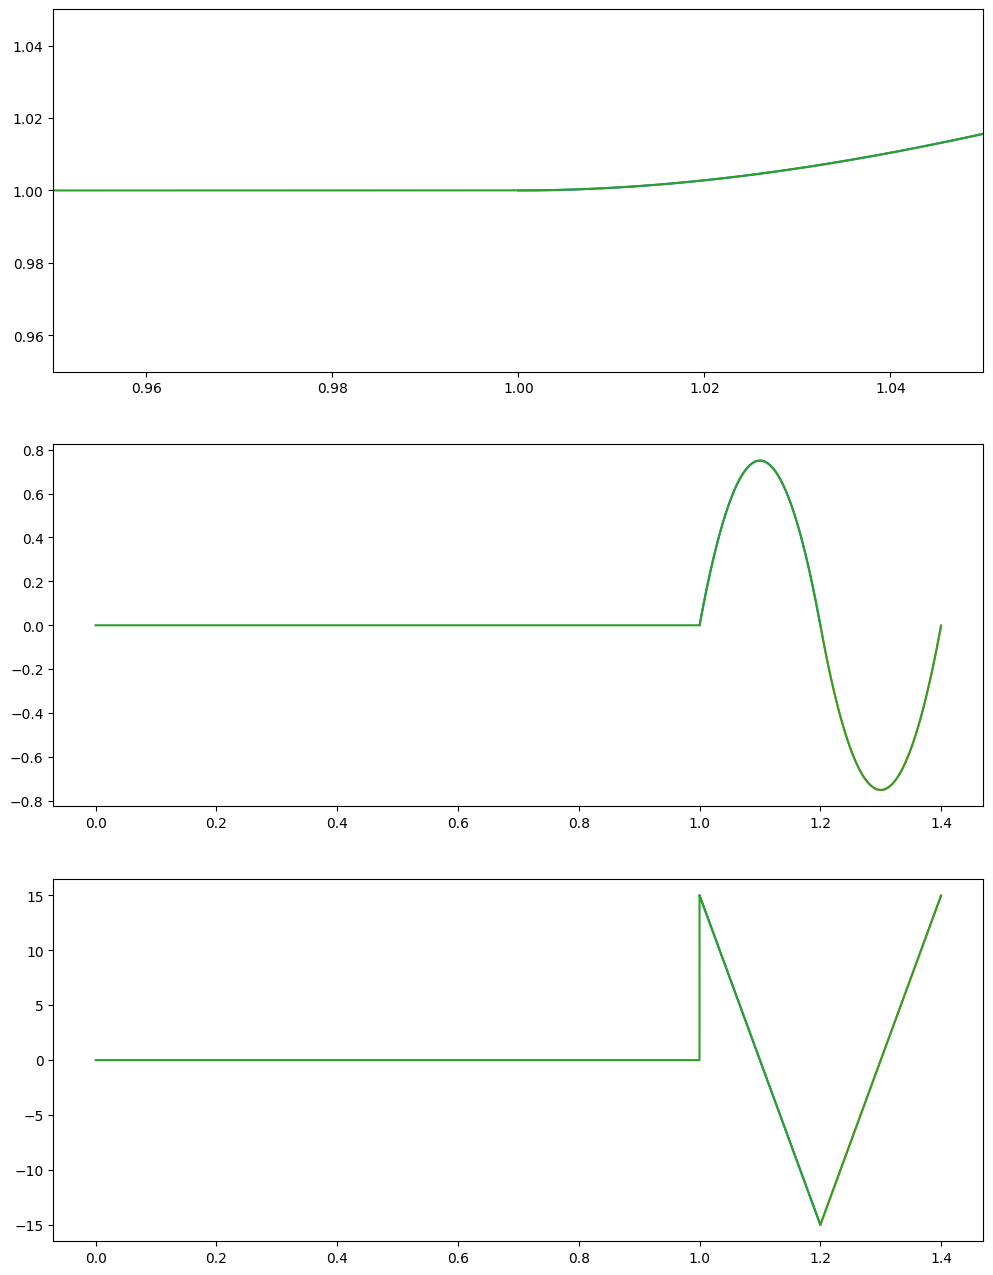

In [2]:
t = [0, 1, 1.2, 1.4]
z = [1, 1, 1.1, 1]

# d = z[1]
# c = 0
# a = (z[2])

splinez0 = spline(x=t[0:2], y=z[0:2], bc_type=((2, 0), (2, 0)))
splinez1 = spline(x=t[1:3], y=z[1:3], bc_type=((1, 0), (1, 0)))
splinez2 = spline(x=t[2:4], y=z[2:4], bc_type=((1, 0), (1, 0)))

splinez = ppoly(c = np.hstack((splinez0.c, splinez1.c, splinez2.c)), x=t)

# Sampling time
ts  = np.arange(t[0], t[-1], 0.0001)
ts1 = np.arange(1, 1.2, 0.0001)
ts2 = np.arange(1.2, 1.4, 0.0001)
zs1 = splinez1(ts1)
zs2 = splinez2(ts2)

zds1 = splinez1.derivative(1)(ts1)
zds2 = splinez2.derivative(1)(ts2)

zdds1 = splinez1.derivative(2)(ts1)
zdds2 = splinez2.derivative(2)(ts2)

# Plot the x y z vs time
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
axes[0].plot(ts1, zs1)
axes[0].plot(ts2, zs2)
axes[0].plot(ts, splinez(ts))
axes[0].set_xlim([0.95, 1.05])
axes[0].set_ylim([0.95, 1.05])

axes[1].plot(ts1, zds1)
axes[1].plot(ts2, zds2)
axes[1].plot(ts, splinez.derivative(1)(ts))

axes[2].plot(ts1, zdds1)
axes[2].plot(ts2, zdds2)
axes[2].plot(ts, splinez.derivative(2)(ts))

splinez.derivative(1)(1.01)
